## Assignment 3

# Determining and removing drawbacks of exponential and running mean

**Starodumova P., Antonov A., Babaev N., Krivova V. | Skoltech EDP course by Tatiana Podladchikova, 2020**

**The objective of Assignment 3 is to detemine conditions for which broadly used methods of running and exponential mean provide effective solution and conditions under which they break down. Important outcome of this assignment is getting skill to choose the most effective method in conditions of uncertainty.**

In [31]:
# Import libraries required for operation with multi-dimensional arrays and matrixes (numpy) 
# and data visualization (matplotlib)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(4)

# Part I. Backward exponential smoothing

In [32]:
# Input initial data

initial_2 = 10
sigma_2 = 28
sigmaMeas_2 = 97

In [33]:
# Define a function which returns a true trajectory generated by using the random walk model

def randomWalk(mean,sigma,size,initial):
    arr = [initial]
    for i in range(0,size  - 1):
        arr.append(arr[i] + np.random.normal(mean,sigma))
    return arr

In [34]:
# Define a function which returnes generated measurements of the process

def measurements(randomWalk,mean,sigma):
    arr = randomWalk.copy()
    for i in range(0,len(arr)):
        arr[i] = arr[i] + np.random.normal(mean,sigma)
    return arr

In [35]:
# Generate a 300-points true trajectory using random walk model 

arr = randomWalk(0,sigma_2,300,10)

In [36]:
# Generate measurements of the aforementioned process

meas = np.array(measurements(arr,0,sigmaMeas_2))

In [37]:
# Define a function which returns alpha

def smoothCoef(x):
    return (-x + (x**2 + 4*x)**0.5)/2

In [38]:
# Determine optimal smoothing coefficient alpha

coef = smoothCoef(sigma_2**2/sigmaMeas_2**2)

In [39]:
print ('Smoothing coefficient alpha equals to %.2f' % coef + '.')

Smoothing coefficient alpha equals to 0.25.


In [40]:
# Define a function which returns an array of smoothed measurements of the process under study

def smoothExp(meas,coef):
    arr = meas.copy()
    arr[0] = arr[0]*coef
    for i in range(1,len(arr)):
        arr[i] = arr[i - 1] + coef*(arr[i] - arr[i - 1])
    return arr

In [41]:
# Define a function which returns an array smoothed by backward exponential smoothing 

def backward(e, α):
    arr = e.copy()
    for i in range(len(arr)-2, -1, -1):
        arr[i] = α * e[i] + (1 - α) * arr[i+1] 
    return arr

In [42]:
# Calculate the running mean

def runningMean(meas,M):
    new_meas = np.array(meas.copy())
    wide = int((M - 1)/2)
    arr = meas.copy()
    for i in range(wide,len(meas) - wide):
        arr[i] = new_meas[i - wide:i + wide + 1].mean()
    return arr

In [43]:
# Calculate the window size rounding the result to integer

M = int(round((2 - coef)/coef))

In [44]:
# Make forward-backward exponential smoothing of monthly mean sunspot number

forwBack = backward(smoothExp(meas, coef), coef)

In [45]:
# Running mean smoothing

smoothedRun = runningMean(meas,M)

In [46]:
# Define a function which plot a graph to compare measurements, true values and smoothed data

def showPlease(arr,legend):
    params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
    plt.rcParams.update(params)
    fig, ax = plt.subplots()
    for i in arr:
        ax.plot(i)
    fig.set_figwidth(24)
    fig.set_figheight(12)
    plt.title('Comparison of true values, measurements and smoothed data', fontsize = 22)
    plt.grid()
    plt.xlabel('Time', fontsize = 18)
    plt.ylabel('Value', fontsize = 18)
    plt.legend(legend)
    plt.show()

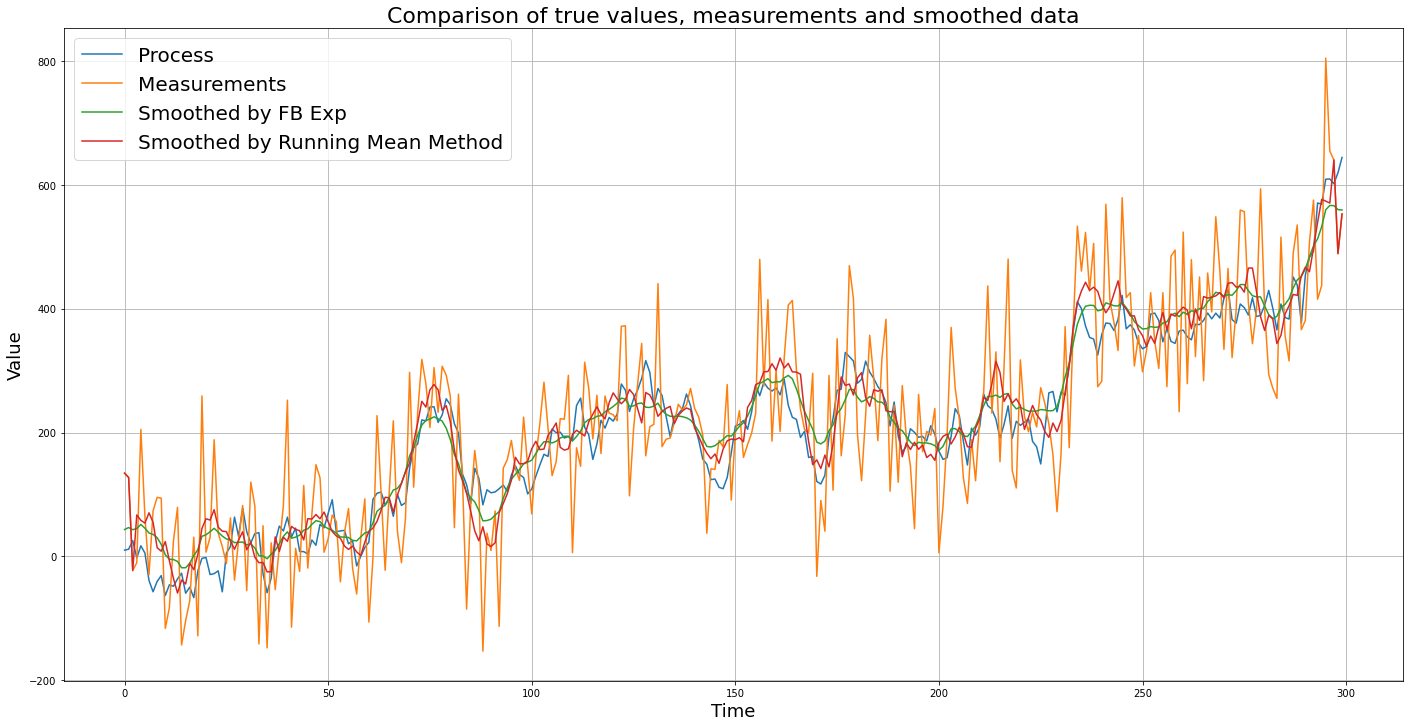

In [47]:
# Plot a graph to compare measurements, true values and smoothed data

showPlease([arr,meas,forwBack,smoothedRun],['Process','Measurements','Smoothed by FB Exp','Smoothed by Running Mean Method'])

**It can been seen from the graph that the data smoothed by FB exponential smoothing is less noisy than the one smoothed by RM and it results in a better undestanding of peaks and troughs location. However,  in order to verify numerically the effectiveness of FB smoothing, deviation and variability indicators should be calculated and compared for both methods.**

In [48]:
# Define a function which returns deviation indicator

def deviation(Z, smooth):
    return sum((Z - smooth) ** 2)

In [49]:
# Define a function which returns variability indicator

def variability(smooth):
    return sum((smooth[2:] - 2 * smooth[1:-1] + smooth[:-2]) ** 2)

In [50]:
print('Deviation indicator for running mean smoothing is %.0f' % deviation(meas, smoothedRun) + '.')
print('Deviation indicator for forward-backward exponential smoothing is %.0f' % deviation(meas, forwBack) + '.')

Deviation indicator for running mean smoothing is 2487852.
Deviation indicator for forward-backward exponential smoothing is 2274240.


In [51]:
print('Variability indicator for running mean smoothing is %.0f' % variability(smoothedRun) + '.')
print('Variability indicator for forward-backward exponential smoothing is %.0f' % variability(forwBack) + '.')

Variability indicator for running mean smoothing is 411923.
Variability indicator for forward-backward exponential smoothing is 15732.


**Both deviation and variability coefficients for FB exponential smoothing are less than the ones for running mean method, which proves the effectiveness of FB smoothing in this particular case - this method provides with smoothing of a better accuracy.**

# Part II. Drawbacks of Running Mean

In [52]:
# Define a function which returns both a true trajectory and its measurements

def first_traj(X=5, V=0, T=0.1, σ=10, n=300, σ_n=500):
    arr = np.zeros(n-1)
    arr = np.append(X, arr)
    α = np.random.normal(0, σ ** 0.5, n)
    vel = np.zeros(n-1)
    vel = np.append(V, vel)
    
    for i in range(1, len(arr)):
        arr[i] = arr[i-1] + vel[i-1] * T + α[i-1] * T ** 2 / 2
        vel[i] = vel[i-1] + α[i - 1] * T
        
        
    n = np.random.normal(0, σ_n ** (0.5), n)
    Z = arr + n        
    return Z, arr

In [53]:
Z, X = first_traj()

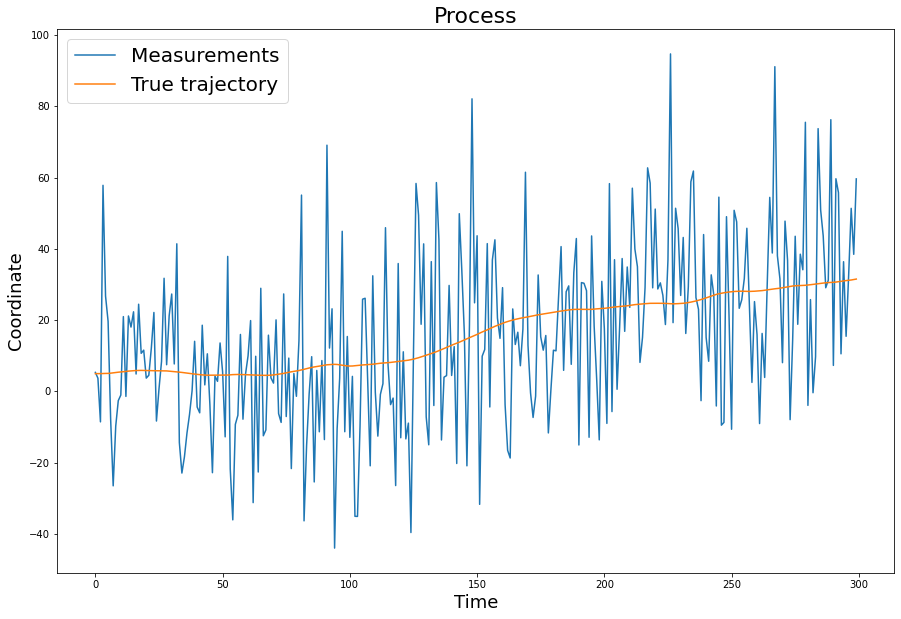

In [54]:
# Plot both a true trajectory and measurements

plt.figure(figsize=(15,10))
plt.plot(Z)
plt.plot(X)
plt.legend(['Measurements', 'True trajectory'])
plt.xlabel('Time', fontsize = 18)
plt.ylabel('Coordinate', fontsize = 18)
plt.title('Process', fontsize = 22);

**Since the true trajectory is more or less linear, and at the same time measurement errors are huge, it is better to use a window size big enough to smooth the noise and a smoothing constant alpha small enough to conduct the same procedure. We tried different values but M = 40 and alpha = 0.1 worked perfectly for us.**

In [55]:
# Define a function which returns array smoothed by running mean

def runMean(B, M):
    A = B.copy().astype('float') 
    A[:int(M // 2)] = A[:int(M // 2)].mean()
    A[int(len(A) - M // 2):] = A[int(len(A) - M // 2):].mean()
    arr = A.copy()
    for i in range(int(M // 2), int(len(A) - M // 2)):
        A[i] = arr[int(i - M //2):int(i + M // 2)+1].mean()
        # print(arr[int(i - M //2):int(i + M // 2)+1])
    return A

In [56]:
# Running mean smoothing 

measRunmean = runMean(Z, 40);

In [57]:
# Exponential smoothing

measExp = smoothExp(Z, 0.1);

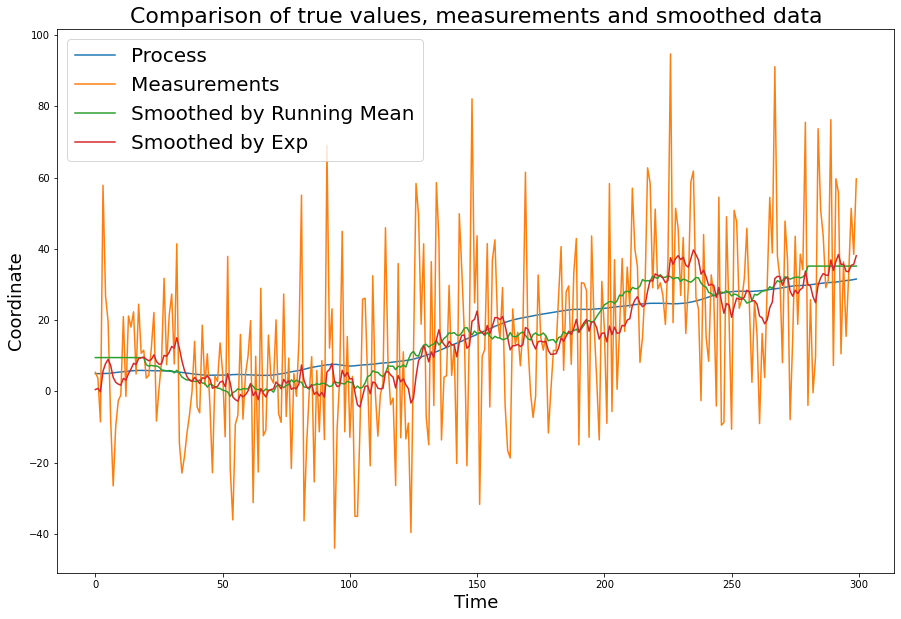

In [58]:
plt.figure(figsize=(15,10))
plt.plot(X)
plt.plot(Z)
plt.plot(measRunmean)
plt.plot(measExp)
plt.legend(['Process', 'Measurements', 'Smoothed by Running Mean', 'Smoothed by Exp'])
plt.xlabel('Time', fontsize = 18)
plt.ylabel('Coordinate', fontsize = 18)
plt.title('Comparison of true values, measurements and smoothed data', fontsize = 22);

**It is not crystal clear from the graph which method is better as both smoothed curves are quite noisy, although forward exponential smoothing has more fluctuations. In order to get a better understanding, deviation and variability coefficients are calculated.**

In [59]:
print('Deviation indicator for running mean smoothing is %.0f' % deviation(Z, measRunmean) + '.')
print('Deviation indicator for forward exponential smoothing is %.0f' % deviation(Z, measExp) + '.')

Deviation indicator for running mean smoothing is 137553.
Deviation indicator for forward exponential smoothing is 123211.


In [60]:
print('Variability indicator for running mean smoothing is %.0f' % variability(measRunmean) + '.')
print('Variability indicator for forward exponential smoothing is %.0f' % variability(measExp) + '.')

Variability indicator for running mean smoothing is 294.
Variability indicator for forward exponential smoothing is 3133.


**Deviation indicator for running mean method turned out to be larger than the one for forward exponential smoothing, however variability coefficient for the latter method is much greater than for running mean smoothing. We would suggest to pay more attention to variability coefficients and choose Running Mean as a more accurate smoothing method in this case.**

In [61]:
# Define a function which returns both a true trajectory and its measurements

def second_traj(T = 32, σ_w=0.08, initial=1, n=200, σ_n=0.05):
    omega = 2 * np.pi / T
    X = []
    Z = []
    for i in range(n):
        X_i = initial * np.sin(omega * i + 3)
        X.append(X_i)
        initial = initial + np.random.normal(0, σ_w, 1)[0]
    X = np.array(X)
    Z = X + np.random.normal(0, σ_n ** 0.5, len(X))
    return Z

In [62]:
Z = second_traj()

In [63]:
# Define a function which returns an array smoothed by running mean

def runningMean(M, A):
    X = np.zeros(len(A))
    wide = int((M-1)/2)
    X[:wide] = np.array(A[:wide]).mean()
    X[-wide:] = np.array(A[-wide:]).mean()
    for i in range(wide, len(A) - wide):
        X_i = np.mean(A[i-wide:i+wide])
        X[i] = X_i
    return X

In [64]:
# At first, we apply window size M = 13

Z_smoothed = runningMean(13, Z)

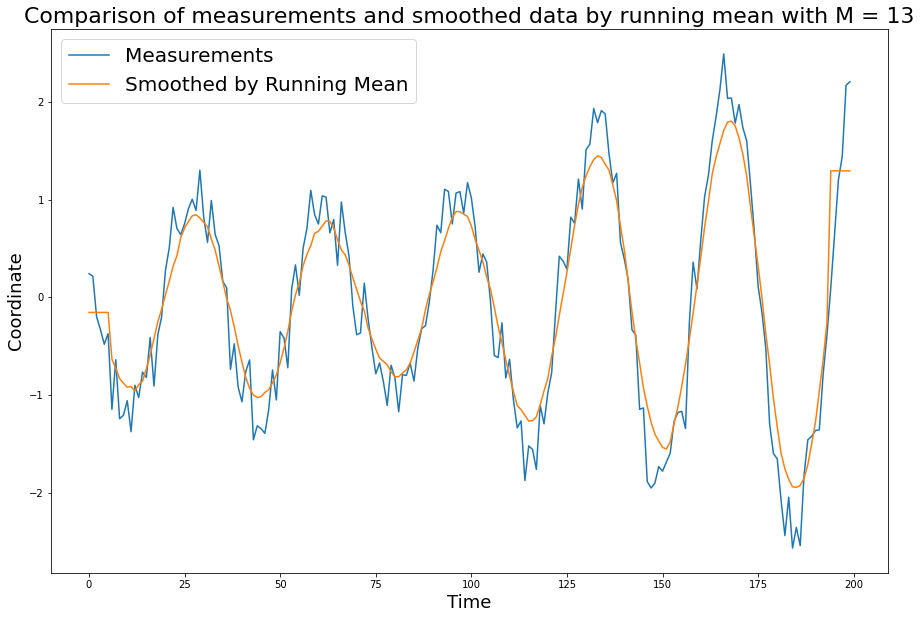

In [67]:
# Plot measurements and smoothed curve by running mean with M = 13

plt.figure(figsize=(15,10))
plt.plot(Z)
plt.plot(runningMean(13, Z));

plt.legend(['Measurements', 'Smoothed by Running Mean'])
plt.xlabel('Time', fontsize = 18)
plt.ylabel('Coordinate', fontsize = 18)
plt.title('Comparison of measurements and smoothed data by running mean with M = 13', fontsize = 22);

**Running mean smoothing accurately repeats bends of the measurements successfully reducing noise. Now we will vary period T of oscillations to obtain running mean smoothing with given M = 15 which a) produces inverse oscillations, b) leads to the loss of oscillations, c) changes the oscillations insignificantly.**

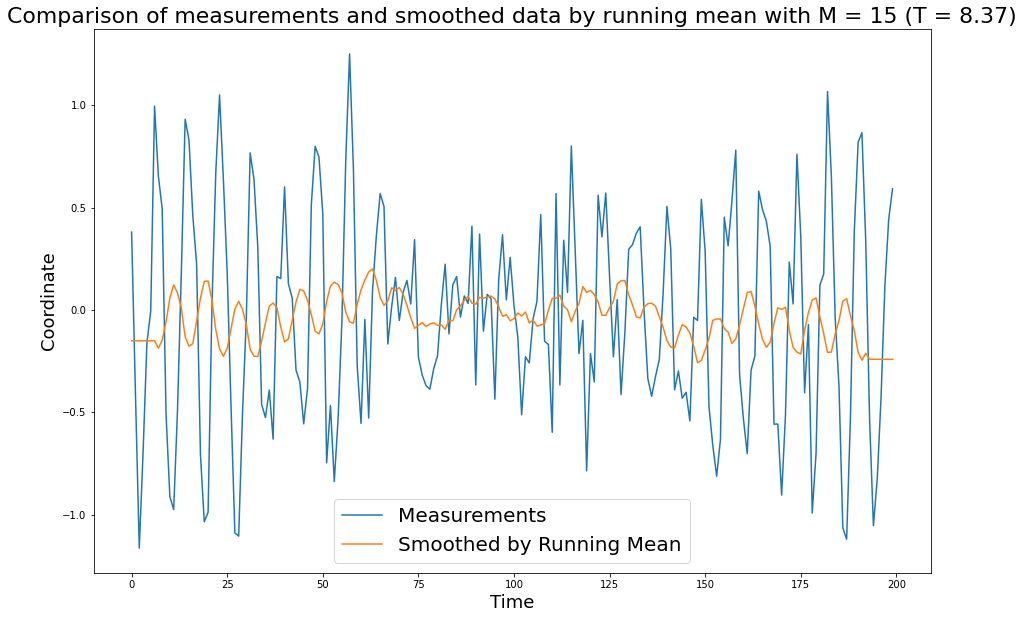

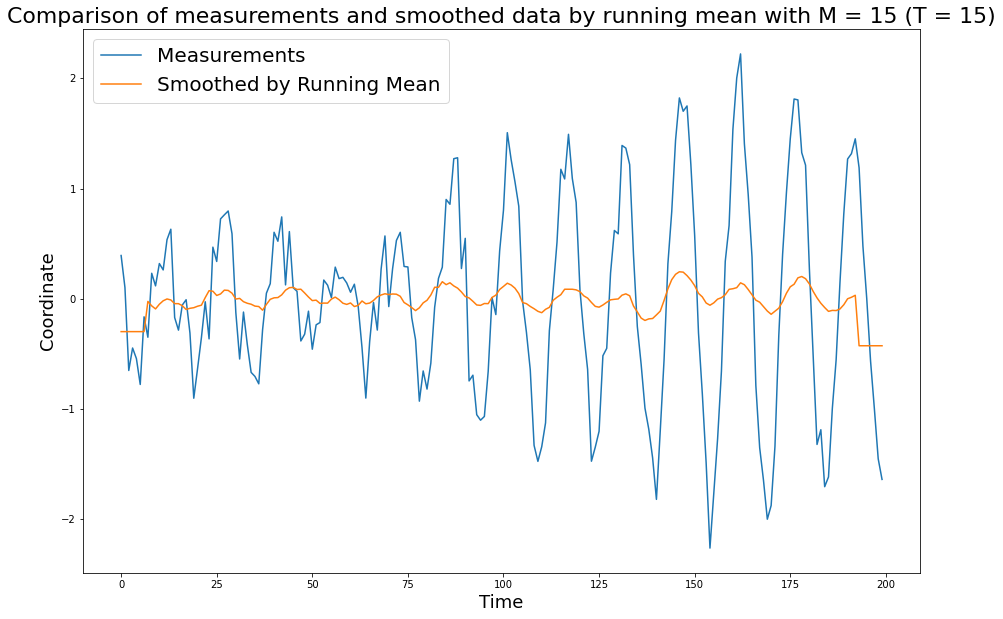

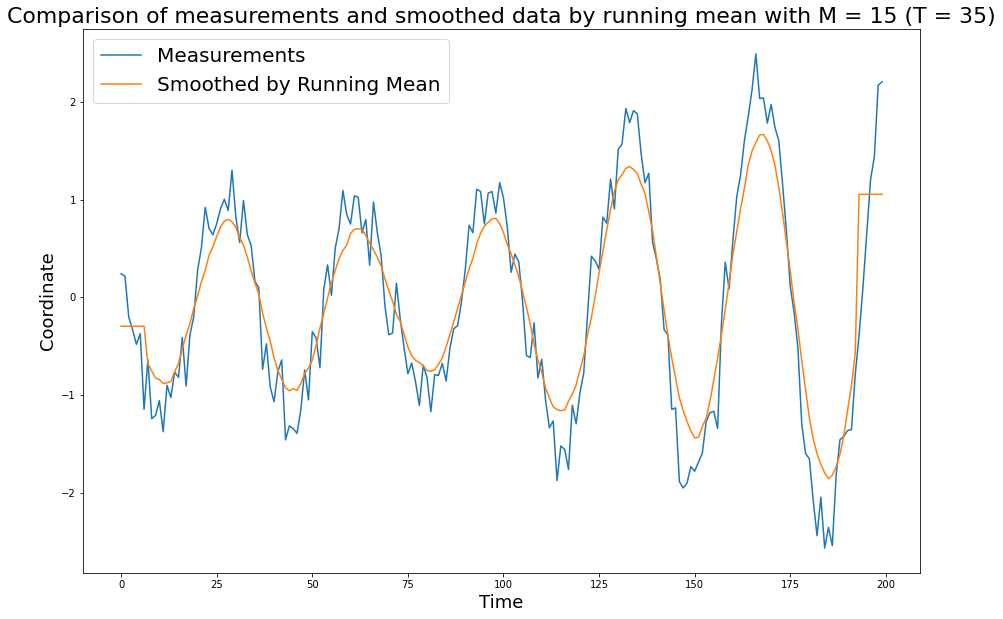

In [68]:
# All period values were obtained experimentally while trying to achieve the required results

np.random.seed(30)

# If we use T < M, we get too much fluctuation while window size is too big resulting in inverse oscillations
Z = second_traj(T = 8.37, σ_w=0.08, initial=1, n=200, σ_n=0.05)
Z_smoothed = runningMean(15, Z)

plt.figure(figsize=(15,10))
plt.plot(Z)
plt.plot(runningMean(15, Z))
plt.legend(['Measurements', 'Smoothed by Running Mean'])
plt.xlabel('Time', fontsize = 18)
plt.ylabel('Coordinate', fontsize = 18)
plt.title('Comparison of measurements and smoothed data by running mean with M = 15 (T = 8.37)', fontsize = 22);

# If we use T = M, the method averaged one full cycle resulting in a loss of oscillations
Z = second_traj(T = 15, σ_w=0.08, initial=1, n=200, σ_n=0.05)
Z_smoothed = runningMean(15, Z)

plt.figure(figsize=(15,10))
plt.plot(Z)
plt.plot(runningMean(15, Z))
plt.legend(['Measurements', 'Smoothed by Running Mean'])
plt.xlabel('Time', fontsize = 18)
plt.ylabel('Coordinate', fontsize = 18)
plt.title('Comparison of measurements and smoothed data by running mean with M = 15 (T = 15)', fontsize = 22);

# If we use T > M, there is no loss of important data changes so smoothing provides us with good results
Z = second_traj(T = 35, σ_w=0.08, initial=1, n=200, σ_n=0.05)
Z_smoothed = runningMean(15, Z)

plt.figure(figsize=(15,10))
plt.plot(Z)
plt.plot(runningMean(15, Z));
plt.legend(['Measurements', 'Smoothed by Running Mean'])
plt.xlabel('Time', fontsize = 18)
plt.ylabel('Coordinate', fontsize = 18)
plt.title('Comparison of measurements and smoothed data by running mean with M = 15 (T = 35)', fontsize = 22);


**As a result, we revealed the dependence of oscillation period and a window size used in running mean smoothing. If oscillation period is smaller than a window size, we get too much information from the data array for a single point which results in smoothing with inverse oscillations. Otherwise, if oscillation period is larger than a window size, we get enough data not to lose specific data properties, so the smoothing curve correctly describes the measurements curve reducing noise. If oscillation period equals to a window size, running mean smoothing avarages full one cycle resulting in a loss of oscillations.**

**Conclusions: The first part of the task turned out to be quite easy for us as it was a continuation of the previous assignment, but still we learnt how to apply forward-backward exponential smoothing and how backward part helps to eliminate a shift of estimations. We found out that forward-backward smoothing has various applications starting from speech recognition and ending with the tracking of aircraft using radar, so it is a helpful smoothing tool for all of us, no matter which track we are in. One of the most important outcomes of this assignment was that although Running Mean, in comparison with Exponential smoothing, provided us with more accurate smoothing in case of very noisy first trajectory, several drawbacks of its use were revealed in case of cyclic trajectory, to be particular, we discovered the importance of correct selection of a window size according to the given oscillation period. We also learnt how to apply numerical indicators (deviation and variability coefficients) for re-checking the correctness of smoothing as data visualisation can sometimes confuse the user and even lead to a wrong understaning. It is the case where true meaning of some theoretical background knowledge is revealed - all of us had probability theory and statistics courses during bachelor degree, but not everyone clearly understood why and in what way we should use, for instance, these coefficients, so this assignment not only teaches us how to apply our background knowledge in one particular case, but also expand our general understanding of this knowledge. During this task we worked a lot with different types of trajectories such as a cyclic trajectory which was new for all of us - since real world mechanics is quite far from perfection, it is essential for us to take into account many different ways of describing the movement of objects. This time we practiced critical thinking even more than before, for instance, during empirical determination of the window size M and a smoothing constant alpha based on the type of observed process. Actually, it is great that we do not just blindly follow the instructions of the assignment, we need to think, analyse and critically reflect on what we obtain, otherwise it is impossible to solve the stated problem. One of the greatest challenges for us was the last task №7 as we struggled with it for the majority of time spent on the whole assignment. Basically we did not manage to get inverted oscillations for a long period of time because of some problems with code as the idea of T and M dependance was more or less clear from the beginning. Nevertheless, we didn't hesitate to ask members from other teams for help - they were happy to do it - and finally found the problem which was not that complex at all but still it had kept ruining the results before we fixed it.**